# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *
from prepareDatabaseForMachineLearning import*

# Generating data

If you want to use multiprocessing to speed up the procces you should run runDatabaseGeneration.py instead of this notebook. This notebook is more for playing with the data then actualy generating it.

## Generating data

In [3]:
numberOfDatapoints = 50
numberOfSurroundingCells = 3
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerTrio# Set the potential energy function of the data base as a function
widthOfCell = [1.5, 10]# The width of a singe cell.
filename = 'test2'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

In [4]:
data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Now generating space.
Done generating space.
Predicted amount of calculations: 3725000 for 50 datapoints.
Assuming 20 us per calculation, estimated time needed: 75 seconds
  2 % done, expected time left 74 seconds, 2 seconds since start.
  4 % done, expected time left 72 seconds, 4 seconds since start.
  6 % done, expected time left 71 seconds, 6 seconds since start.
  8 % done, expected time left 69 seconds, 8 seconds since start.
 10 % done, expected time left 68 seconds, 10 seconds since start.
 12 % done, expected time left 66 seconds, 12 seconds since start.
 14 % done, expected time left 65 seconds, 14 seconds since start.
 16 % done, expected time left 63 seconds, 16 seconds since start.
 18 % done, expected time left 62 seconds, 18 seconds since start.
 20 % done, expected time left 60 seconds, 20 seconds since start.
 22 % done, expected time left 59 seconds, 22 seconds since start.
 24 % done, expected time left 57 seconds, 24 seconds since start.
 26 % done, expected time le

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [5]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

"""
data = dataRead
#"""

dataRead.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.35687360560000003, 3.6789675242], [3.32000...",6.489163,3,0.000000
1,"[[4.2841194615, 8.0695901187], [5.4609182183, ...",8.122249,3,0.000000
2,"[[1.1064889347, 3.6577196433], [2.4648055332, ...",4.210354,3,-0.032936
3,"[[0.5519010802000001, 4.3429438082], [1.014406...",9.245697,3,-0.008283
4,"[[0.7990470550000001, 3.293972291], [5.1501721...",5.808798,3,-0.004799


## Merging files

In [6]:
toMerge = ['test1', 'test2']# File names of the things to merge.
toMerge = ['databaseModLen_min_cut0.90_widths86_Width1.5-10_data50k_3-1sur_epoch30_maxDelta0.1_1', 'databaseModLen_min_cut0.90_widths86_Width1.5-10_data25k_3-1sur_epoch30_maxDelta0.1_2', 'databaseModLen_min_cut0.90_widths86_Width1.5-10_data25k_3-1sur_epoch30_maxDelta0.1_3']
outputFilename = 'databaseModLen_min_cut0.90_widths86_Width1.5-10_3-1sur_epoch30_maxDelta0.1'
#outputFilename = 'testCombined'

dataFrames = []
for name in toMerge:
    imported = pd.read_json(name + '.json', orient='columns')
    #imported['particleCoordinates'] = imported['particleCoordinates'].apply(np.array)
    dataFrames.append(imported)

total = pd.concat(dataFrames, ignore_index = True, sort = False)
total.to_json(outputFilename + '.json', orient='columns')

## Inspecting data

In [7]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.35687360557301806, 3.678967524176565], [3....",6.489163,3,0.000000
1,"[[4.284119461512191, 8.069590118711368], [5.46...",8.122249,3,0.000000
2,"[[1.1064889347362947, 3.6577196433148824], [2....",4.210354,3,-0.032936
3,"[[0.5519010801841023, 4.342943808159835], [1.0...",9.245697,3,-0.008283
4,"[[0.7990470549767255, 3.293972290991283], [5.1...",5.808798,3,-0.004799


In [8]:
data.describe()

,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,50.000000,50.0,50.000000
mean,6.481025,3.0,1053.368407
std,2.442643,0.0,6962.673608
min,1.569781,3.0,-8.995329
25%,5.109606,3.0,-0.008187
50%,6.530238,3.0,0.000000
75%,8.518167,3.0,0.000000
max,9.974143,3.0,49208.167564


Plotting datapoint  0  with energy  0.0


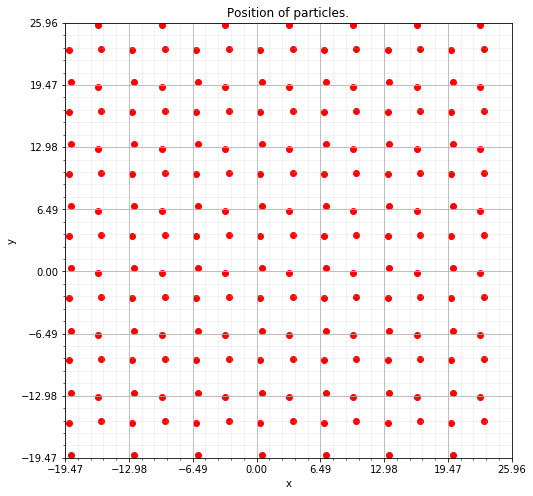

Plotting datapoint  1  with energy  0.0


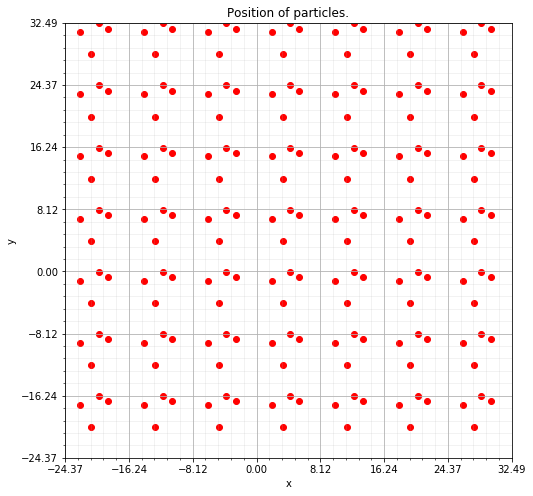

Plotting datapoint  2  with energy  -0.032936395267330346


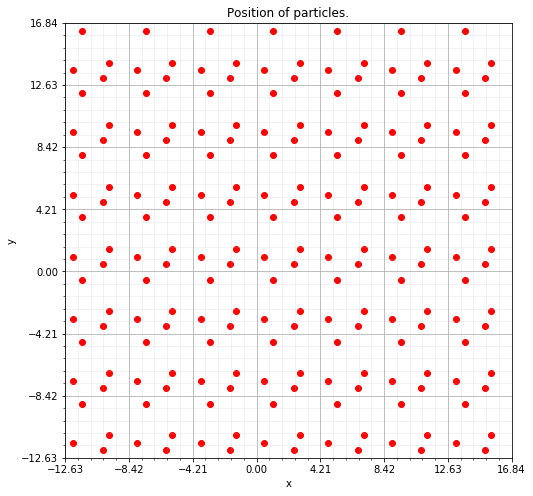

Plotting datapoint  3  with energy  -0.008283020533079105


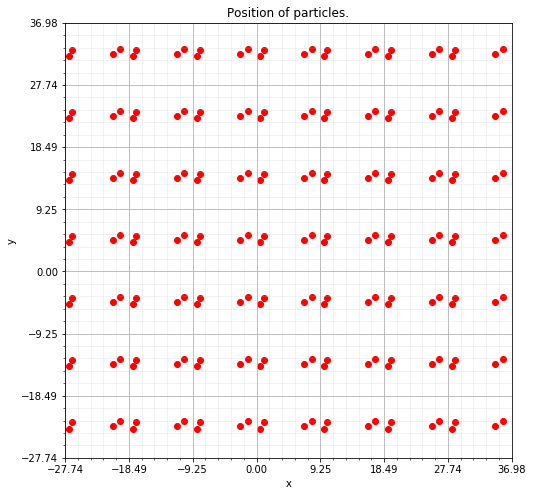

Plotting datapoint  4  with energy  -0.004799466873777853


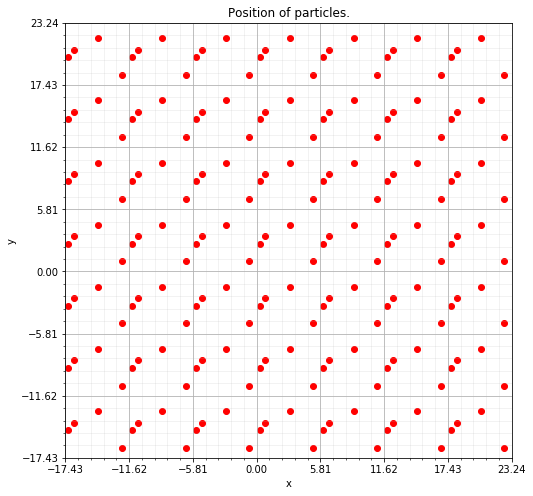

Plotting datapoint  5  with energy  0.0


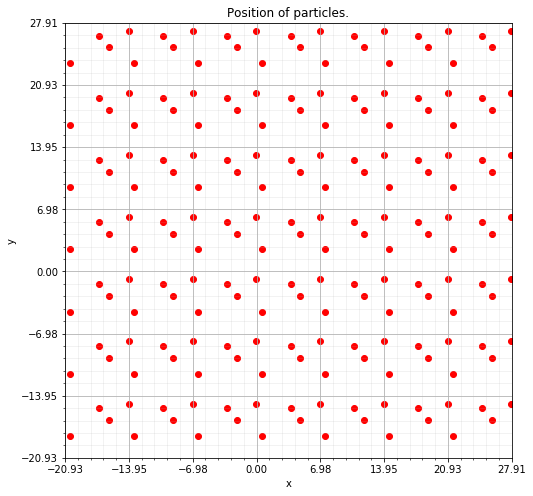

Plotting datapoint  6  with energy  0.0


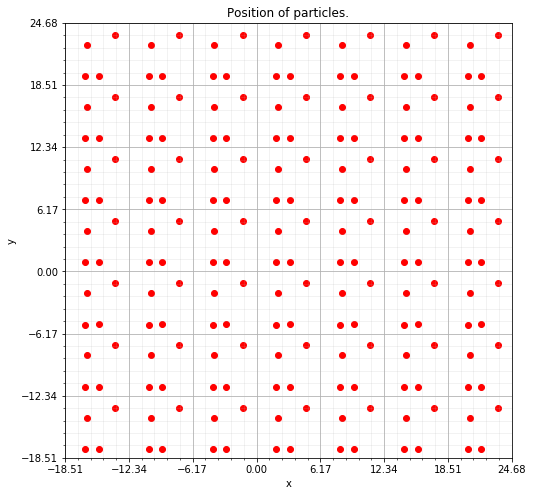

Plotting datapoint  7  with energy  0.0


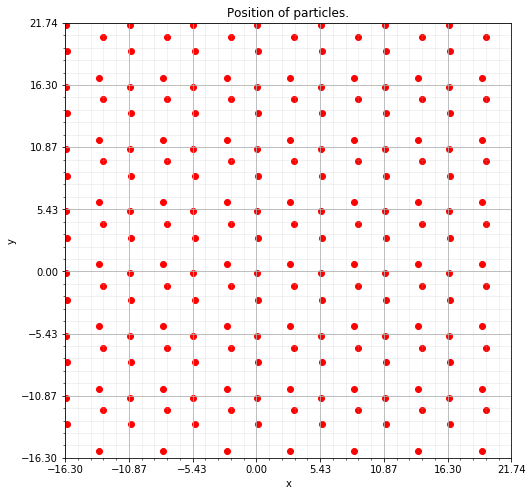

Plotting datapoint  8  with energy  -2.6293542398872387


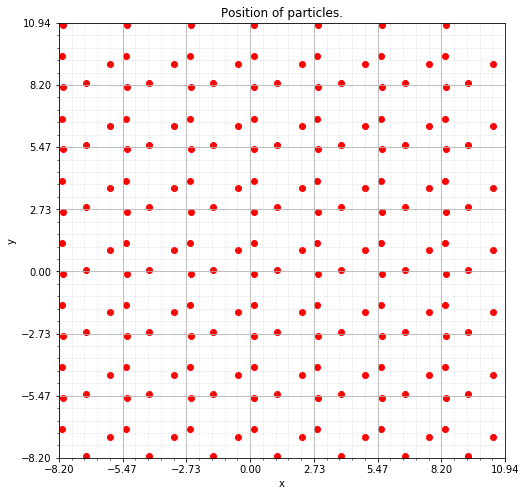

Plotting datapoint  9  with energy  0.0


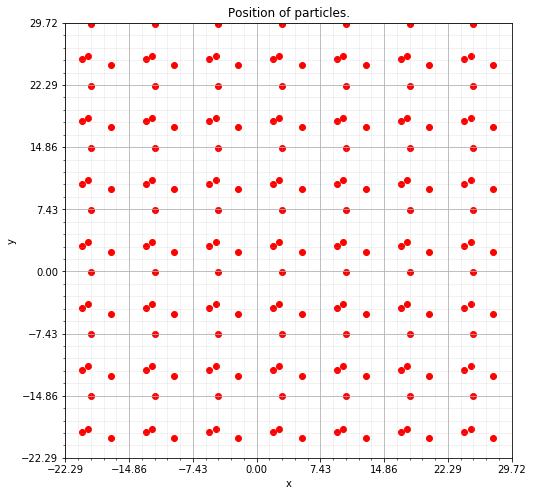

In [9]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

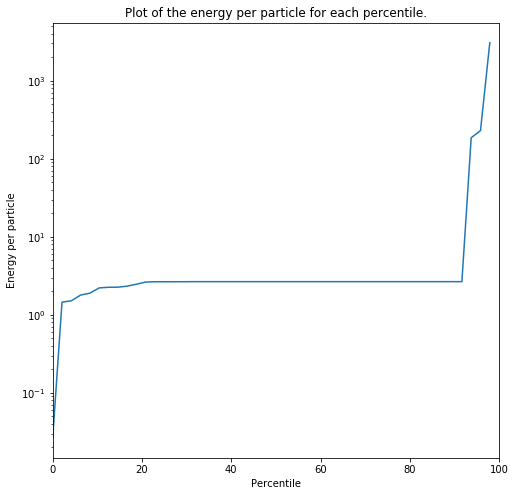

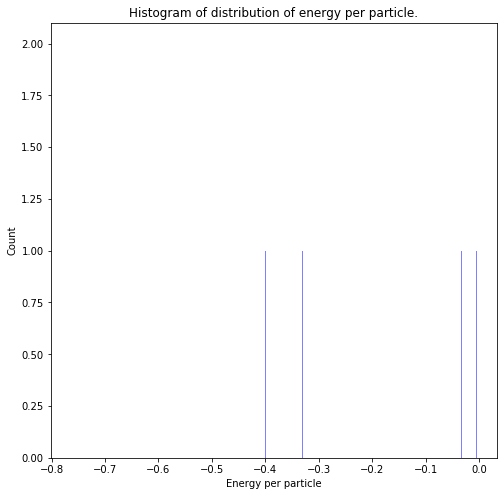

In [10]:
## The code below is for plotting diagrams.
# Filter the data for the percentile plot.
qLow = data['potentialEnergy'].quantile(0.01)
qHi  = data['potentialEnergy'].quantile(0.99)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
#bins = [5**i for i in range(math.floor(math.log(max(min(x), 10**-30)) / math.log(5)) - 4, 26)]

# Make the percentile plot.
fig, ax = plt.subplots(figsize=(8, 8))
sortedX = np.sort(x) + 1.01 * abs(min(x))
ax.plot([100*i/len(x) for i in range(0, len(x))], sortedX)
ax.set_xlim(0, 100)
ax.set_yscale('log')
ax.set_title('Plot of the energy per particle for each percentile.')
ax.set_ylabel('Energy per particle')
ax.set_xlabel('Percentile')
plt.show()

# Filter the data for the normal historgram.
qLow = data['potentialEnergy'].quantile(0.10)
qHi  = data['potentialEnergy'].quantile(0.90)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
numBins = 1000

# Make the normal historgram.
fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, numBins, facecolor='blue', alpha=0.5)
ax.set_title('Histogram of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

# Prepare database for machine learning

In [11]:
R0 = 20

In [12]:
dataPrepared = prepareDatabseForMachineLearning(data, [-2, -3], R0)

  2 % done, expected time left 7 seconds, 1 seconds since start.
  4 % done, expected time left 4 seconds, 1 seconds since start.
  6 % done, expected time left 3 seconds, 1 seconds since start.
  8 % done, expected time left 3 seconds, 1 seconds since start.
 10 % done, expected time left 2 seconds, 1 seconds since start.
 12 % done, expected time left 2 seconds, 1 seconds since start.
 14 % done, expected time left 2 seconds, 1 seconds since start.
 16 % done, expected time left 2 seconds, 1 seconds since start.
 18 % done, expected time left 2 seconds, 1 seconds since start.
 20 % done, expected time left 2 seconds, 1 seconds since start.
 22 % done, expected time left 2 seconds, 1 seconds since start.
 24 % done, expected time left 2 seconds, 1 seconds since start.
 26 % done, expected time left 2 seconds, 1 seconds since start.
 28 % done, expected time left 2 seconds, 1 seconds since start.
 30 % done, expected time left 2 seconds, 1 seconds since start.
 32 % done, expected time

In [13]:
print(dataPrepared['eigenvalues'][0])

dataPrepared.head()

[-88.50775290972011, -44.2679939795003, -35.804066540012215, 364.5030458738356, -695.9439676520311, -252.90395643586908, -152.43333861157802, 1538.6314648375746]


,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues,relativeDistances
0,0,"[[0.35687360557301806, 3.678967524176565], [3....",6.489163,3,0.000000,"[-88.50775290972011, -44.2679939795003, -35.80...","[6.4891629567340825, 0.0, 0.0, 0.0, 0.0, 6.332..."
1,1,"[[4.284119461512191, 8.069590118711368], [5.46...",8.122249,3,0.000000,"[-215.4247579196899, -43.734615310975585, 20.3...","[8.122248642926792, 0.0, 0.0, 0.0, 0.0, 1.8571..."
2,2,"[[1.1064889347362947, 3.6577196433148824], [2....",4.210354,3,-0.032936,"[-353.8956274492646, -163.7621359011199, -15.4...","[4.210353918713899, 0.0, 0.0, 0.0, 0.0, 1.1742..."
3,3,"[[0.5519010801841023, 4.342943808159835], [1.0...",9.245697,3,-0.008283,"[-369.2834747429393, -232.48413111077824, 159....","[9.245696661542262, 0.0, 0.0, 0.0, 0.0, 1.0791..."
4,4,"[[0.7990470549767255, 3.293972290991283], [5.1...",5.808798,3,-0.004799,"[-538.1480577314975, -54.597517714677, 52.7030...","[5.808797889488638, 0.0, 0.0, 0.0, 0.0, 0.7466..."


In [14]:
orderOfMatrix = [-2, -3]
offset = 0

R0 = 20
x = np.linspace(1.5, 10, 60)

testData = {'particleCoordinates': [],'widthOfCell':[] , 'numberOfSurroundingCells': [], 'potentialEnergy':[]}# Initialy use a dictionary because it's easier to append to than a dataframe.
for i in x:
    particles = [np.array([0.25, 0.75]), np.array([0.25, 0.25]), np.array([0.75, 0.25]), np.array([0.75, 0.75])]
    #particles = [np.array([0.3, 0.5]), np.array([0.3, 0.4]), np.array([0.6, 0.4]), np.array([0.5, i])]
    particles = [i * coordinate for coordinate in particles]
    otherSpace = generateSpace(particles, 2, i)# Generate the other space.
    testData['particleCoordinates'].append(particles)
    testData['widthOfCell'].append(i)
    testData['numberOfSurroundingCells'].append(numberOfSurroundingCells)
    testData['potentialEnergy'].append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrio) - offset)# Calculate the potential energy and save it to the data dictonairy.

x = widthOfCell * x
testData = prepareDatabseForMachineLearning(pd.DataFrame(testData), orderOfMatrix, R0, giveUpdates = False)

#for i in range(len(x)):
#    print(testData['eigenvalues'][i])

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), [testData['eigenvalues'][i] for i in range(len(testData['eigenvalues']))])
ax1.legend()
ax1.set_ylim(-1000, 1000)
ax1.set_xlabel('Width of cells')
ax1.set_ylabel('Eigenvalues')
ax1.set_title('Eigenvalues for different widhts of cells.')
plt.show()

testData.head()
testData.describe()


ValueError: operands could not be broadcast together with shapes (2,) (60,) 

In [ ]:
widthOfCell = 5.0
numberOfSurroundingCells = 3
R0 = 20
x = np.linspace(0.1, 1.1, 60)

testData = {'particleCoordinates': [],'widthOfCell':[] , 'numberOfSurroundingCells': [], 'potentialEnergy':[]}# Initialy use a dictionary because it's easier to append to than a dataframe.
for i in x:
    particles = [np.array([0.1, 0.1]), np.array([0.55, 0.9]), np.array([0.6, 0.665]), np.array([0.5, i])]
    #particles = [np.array([0.3, 0.5]), np.array([0.3, 0.4]), np.array([0.6, 0.4]), np.array([0.5, i])]
    particles = [widthOfCell * coordinate for coordinate in particles]
    otherSpace = generateSpace(particles, numberOfSurroundingCells, widthOfCell)# Generate the other space.
    testData['particleCoordinates'].append(particles)
    testData['widthOfCell'].append(widthOfCell)
    testData['numberOfSurroundingCells'].append(numberOfSurroundingCells)
    testData['potentialEnergy'].append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrio) - offset)# Calculate the potential energy and save it to the data dictonairy.

x = widthOfCell * x
testData = prepareDatabseForMachineLearning(pd.DataFrame(testData), orderOfMatrix, R0, giveUpdates = False)

#for i in range(len(x)):
#    print(testData['eigenvalues'][i])

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), [testData['eigenvalues'][i] for i in range(len(testData['eigenvalues']))])
ax1.legend()
ax1.set_ylim(-1000, 1000)
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Eigenvalues')
ax1.set_title('Eigenvalues for different positions.')
plt.show()

testData.head()
testData.describe()

y = [[],[]]
for i in range(len(x)):
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
#ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))
plt.show()
